In [18]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [30]:
# Load dataset (replace 'dataset.csv' with your actual file path)
data = pd.read_csv("D:\IITG\other courses\AIML project1\disease_data.csv")

# Display the first few rows of the dataset
print(data.head())


         date    country  id  active    age  alco  ap_hi  ap_lo  cholesterol  \
0  03-05-2021  Indonesia   0       1  18393     0    110     80            1   
1  05-08-2021   Malaysia   1       1  20228     0    140     90            3   
2  13-11-2022  Indonesia   2       0  18857     0    130     70            3   
3  31-10-2018  Singapore   3       1  17623     0    150    100            1   
4  25-09-2020  Singapore   4       0  17474     0    100     60            1   

   gender  gluc  height  occupation  smoke  weight  disease  
0       2     1     168   Architect      0    62.0        0  
1       1     1     156  Accountant      0    85.0        1  
2       1     1     165        Chef      0    64.0        1  
3       2     1     169      Lawyer      0    82.0        1  
4       1     1     156   Architect      0    56.0        0  


date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64
                 id        active           age          alco         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900      0.803729  19468.865814      0.053771    128.817286   
std    28851.302323      0.397179   2467.251667      0.225568    154.011419   
min        0.000000      0.000000  10798.000000      0.000000   -150.000000   
25%    25006.750000      1.000000  17664.000000      0.000000    120.000000   
50%    50001.500000      1.000000  19703.000000      0.000000    120.000000   
75%    74889.250000      1.000000  21327.000000      0.000000    140.000000   
max    99999.000000      1.000000  23713.000000      1.000000  16020.000000   

   

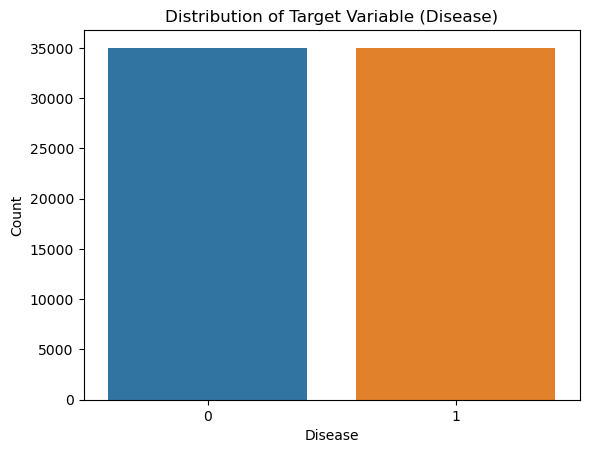

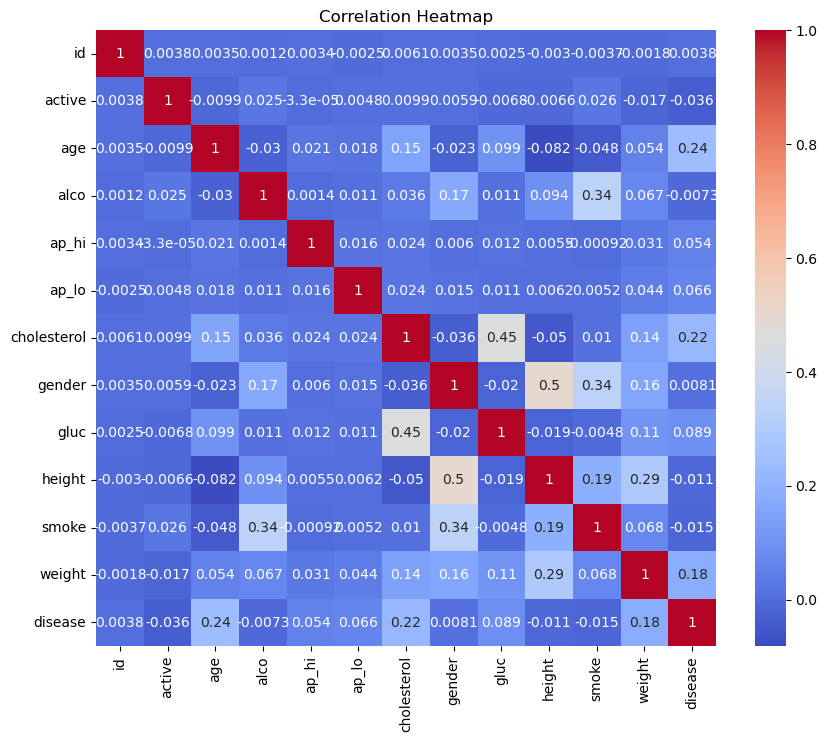

In [31]:
# Check for null values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Check class distribution
print(data['disease'].value_counts())

# Re-plot the distribution
sns.countplot(x='disease', data=data)
plt.title('Distribution of Target Variable (Disease)')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [32]:
data.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


In [33]:
data = data.drop(columns=['id', 'date', 'country', 'occupation'], axis=1)
# Map numeric gender values
data['gender'] = data['gender'].map({1: 0, 2: 1})

data['active'] = data['active'].astype(int)
data['alco'] = data['alco'].astype(int)
data['smoke'] = data['smoke'].astype(int)
X = data.drop('disease', axis=1)
y = data['disease']



In [34]:
X.head()

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight
0,1,18393,0,110,80,1,1,1,168,0,62.0
1,1,20228,0,140,90,3,0,1,156,0,85.0
2,0,18857,0,130,70,3,0,1,165,0,64.0
3,1,17623,0,150,100,1,1,1,169,0,82.0
4,0,17474,0,100,60,1,0,1,156,0,56.0


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, kernel='linear')
}

# Train models and collect their performance
model_results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Save results
    model_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert results to a DataFrame for better visualization
import pandas as pd

results_df = pd.DataFrame(model_results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.712048   0.730200  0.672098  0.699945
1        Decision Tree  0.629667   0.629665  0.628645  0.629155
2        Random Forest  0.714238   0.719235  0.702306  0.710670
3                  SVM  0.718571   0.763751  0.632457  0.691931


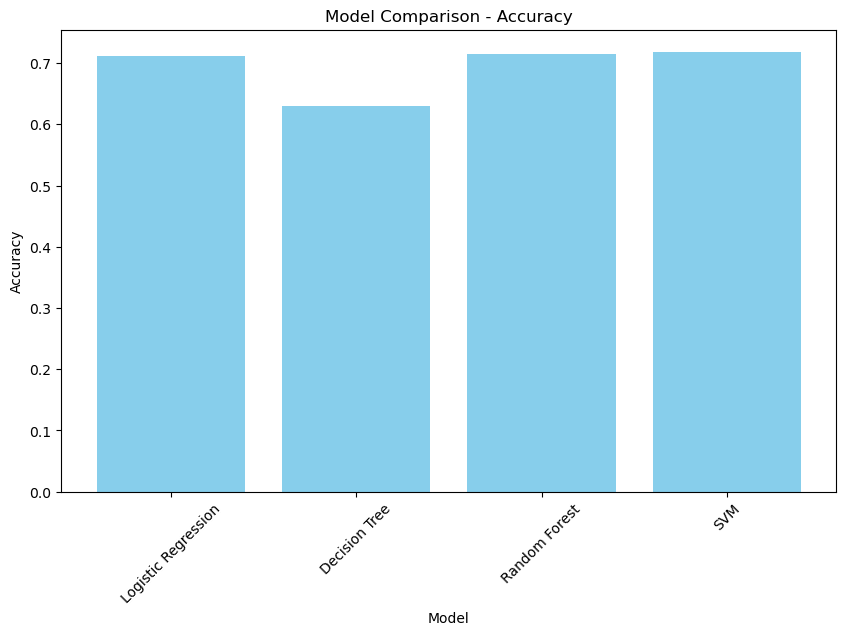

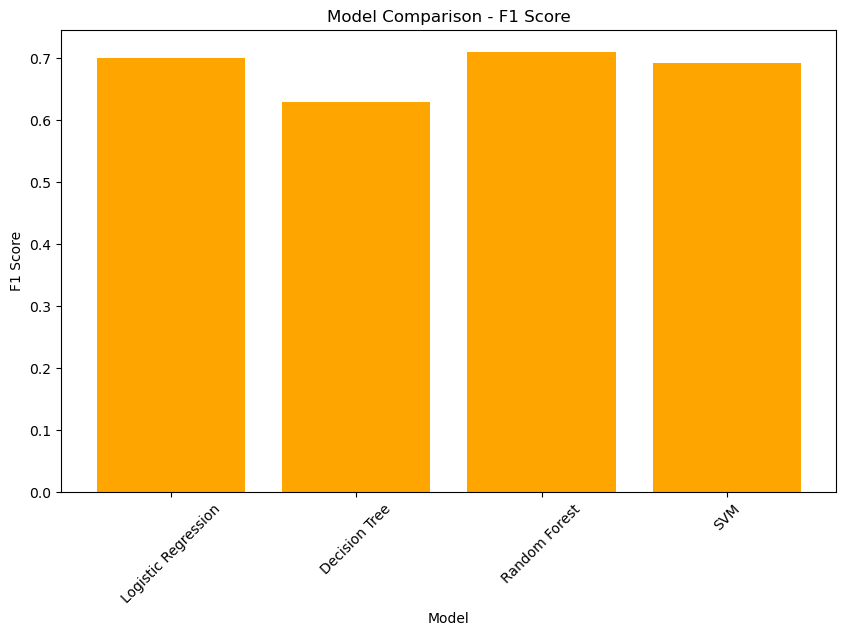

In [38]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Plot F1-Score comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['F1-Score'], color='orange')
plt.title('Model Comparison - F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()


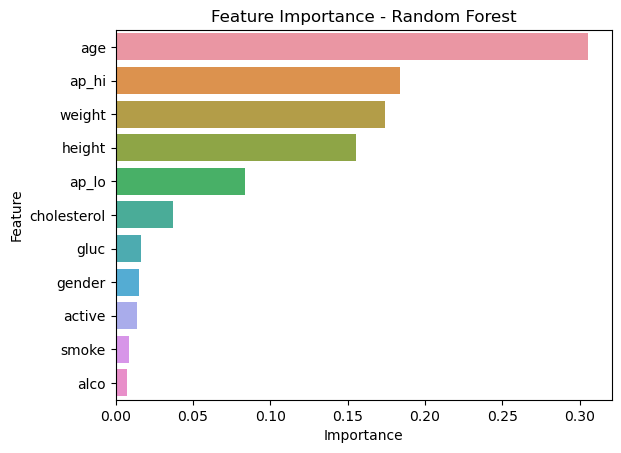

In [39]:
# Feature importance from Random Forest
best_model = models['Random Forest']  # Replace with the best model if needed
importance = best_model.feature_importances_
features = X.columns

# Create DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()


In [41]:
print("Summary of Model Performance:")
print(results_df)

# Insights into the dataset
print("\nKey predictors of heart disease based on the Random Forest model:")
print(importance_df.head())


Summary of Model Performance:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.712048   0.730200  0.672098  0.699945
1        Decision Tree  0.629667   0.629665  0.628645  0.629155
2        Random Forest  0.714238   0.719235  0.702306  0.710670
3                  SVM  0.718571   0.763751  0.632457  0.691931

Key predictors of heart disease based on the Random Forest model:
   Feature  Importance
1      age    0.305197
3    ap_hi    0.183551
10  weight    0.173786
8   height    0.155076
4    ap_lo    0.083492
